# Evaluation of test year GCM-driven run

In [2]:
import valenspy as vp
from valenspy._utilities import load_yml
from valenspy.processing.select import select_point
from valenspy.diagnostic.functions import mean_bias, mean_absolute_error, root_mean_square_error, spearman_correlation, perkins_skill_score, time_series_spatial_mean
from valenspy.diagnostic.visualizations import plot_time_series, plot_map
from pathlib import Path

import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import pandas as pd

from eval_gcm_functions import *

# define machine name - used for paths of (observational) datasets
machine = 'hortense'

manager = vp.InputManager(machine=machine)

## 0. Pre-defining 

## 2. BEL 28

In [3]:
# Define datasets
gcm = 'EC-Earth'
domain = 'BEL28'
model = "CCLM"
experiment_type = "test"
experiment = f"CB2_{model}_{domain}_{gcm}_{experiment_type}"

experiment_era5 = f"CB2_{model}_{domain}_ERA5_evaluation"

figdir = "../../output/figures_gcm_evaluation/"
figdir_exp = figdir + f"{experiment}/"
Path(figdir_exp).mkdir(parents=True, exist_ok=True)

### Temperature 2m

/dodrio/scratch/projects/2022_200/project_output/rcs/CORDEXBE2/postprocessing/CB2_CCLM_BEL28_EC-Earth_test/T_2M/daily/T_2M_daily_mean_1995.nc
['/dodrio/scratch/projects/2022_200/project_output/rcs/CORDEXBE2/postprocessing/CB2_CCLM_BEL28_ERA5_evaluation/T_2M/daily/T_2M_daily_mean_1982.nc', '/dodrio/scratch/projects/2022_200/project_output/rcs/CORDEXBE2/postprocessing/CB2_CCLM_BEL28_ERA5_evaluation/T_2M/daily/T_2M_daily_mean_1983.nc', '/dodrio/scratch/projects/2022_200/project_output/rcs/CORDEXBE2/postprocessing/CB2_CCLM_BEL28_ERA5_evaluation/T_2M/daily/T_2M_daily_mean_1984.nc', '/dodrio/scratch/projects/2022_200/project_output/rcs/CORDEXBE2/postprocessing/CB2_CCLM_BEL28_ERA5_evaluation/T_2M/daily/T_2M_daily_mean_1985.nc', '/dodrio/scratch/projects/2022_200/project_output/rcs/CORDEXBE2/postprocessing/CB2_CCLM_BEL28_ERA5_evaluation/T_2M/daily/T_2M_daily_mean_1986.nc', '/dodrio/scratch/projects/2022_200/project_output/rcs/CORDEXBE2/postprocessing/CB2_CCLM_BEL28_ERA5_evaluation/T_2M/daily/T

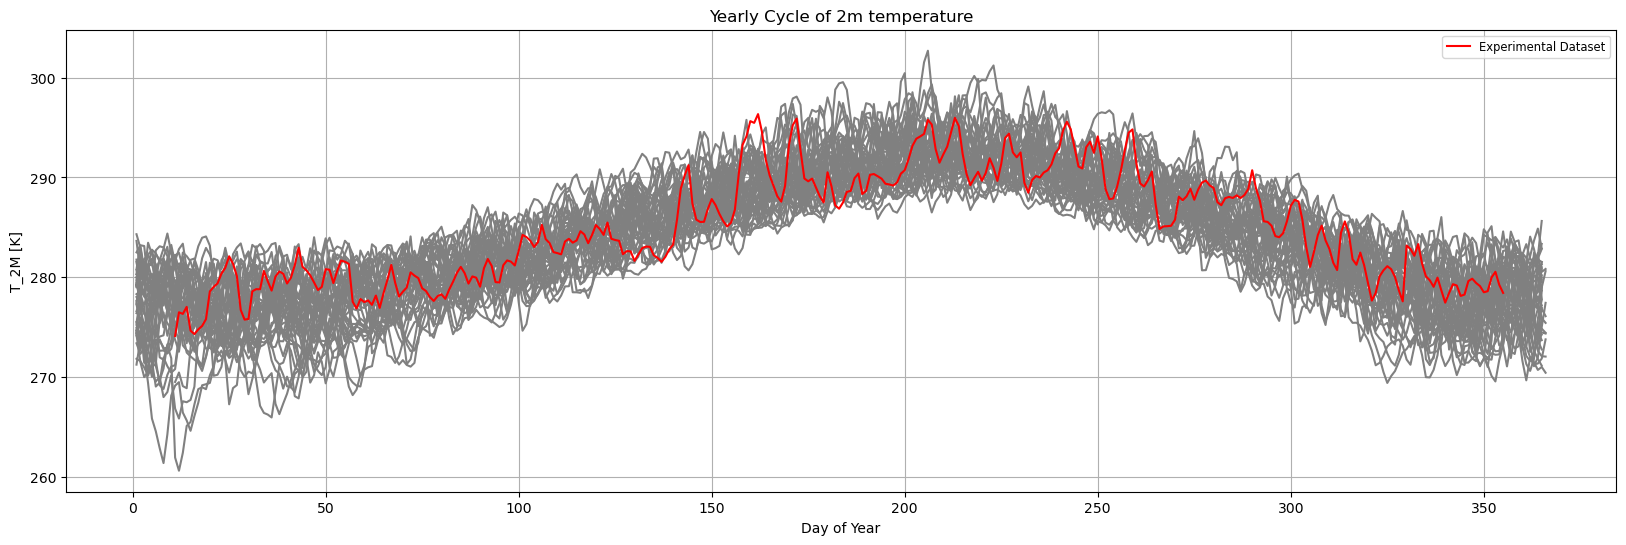

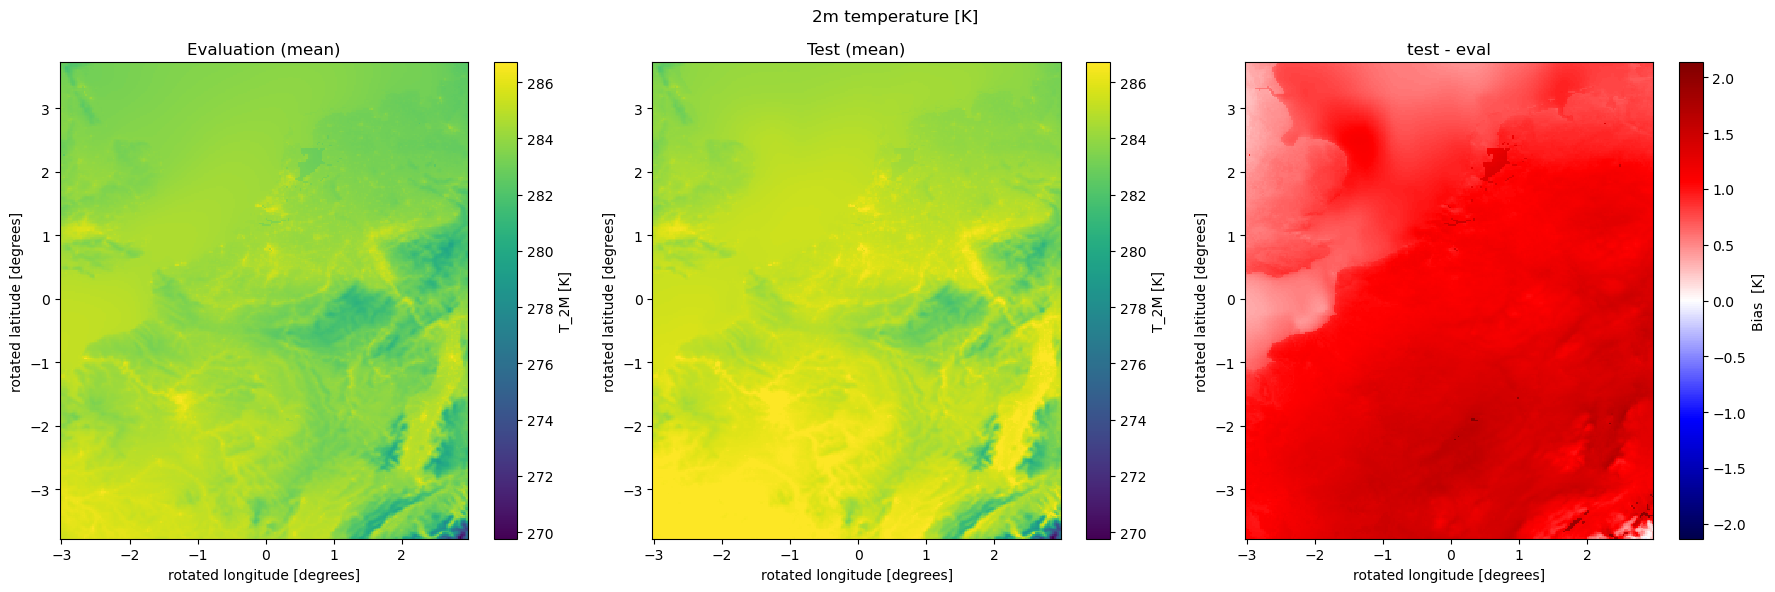

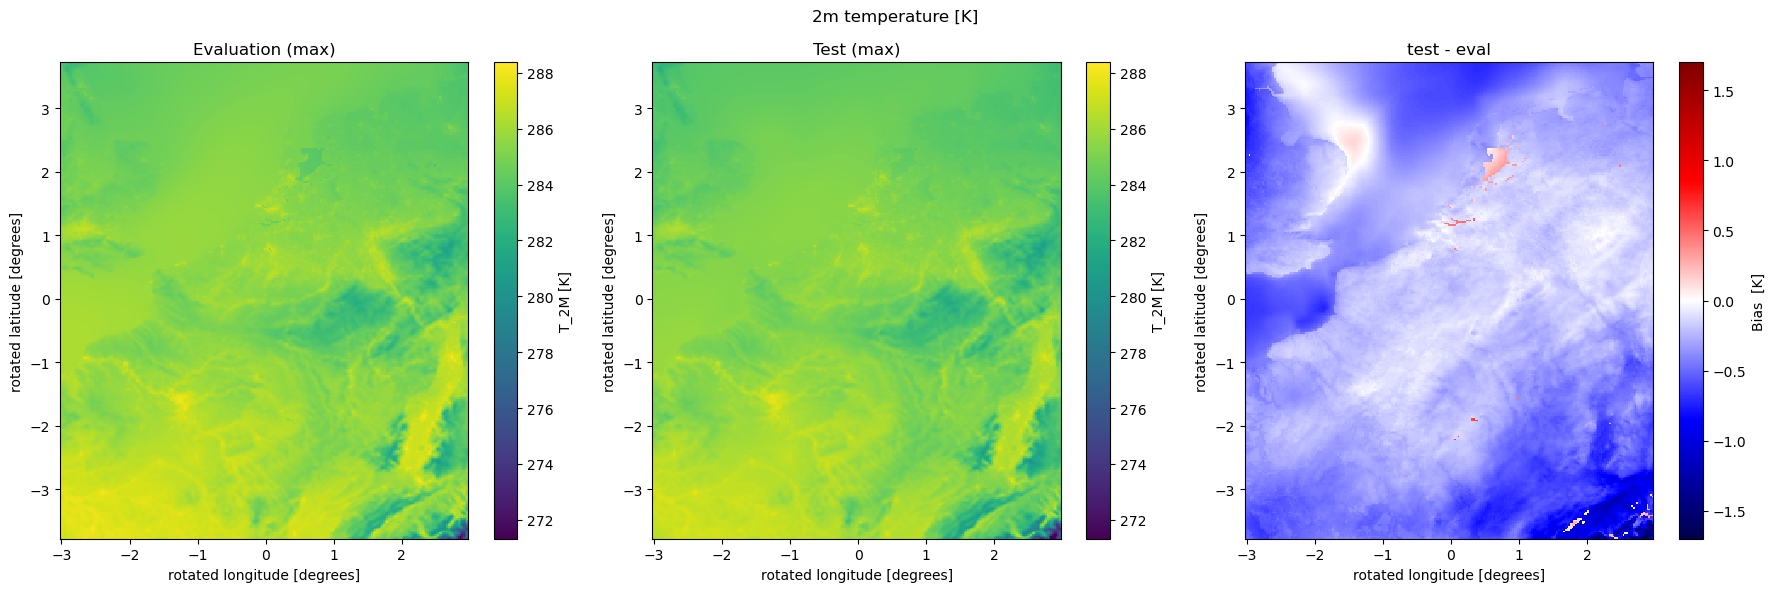

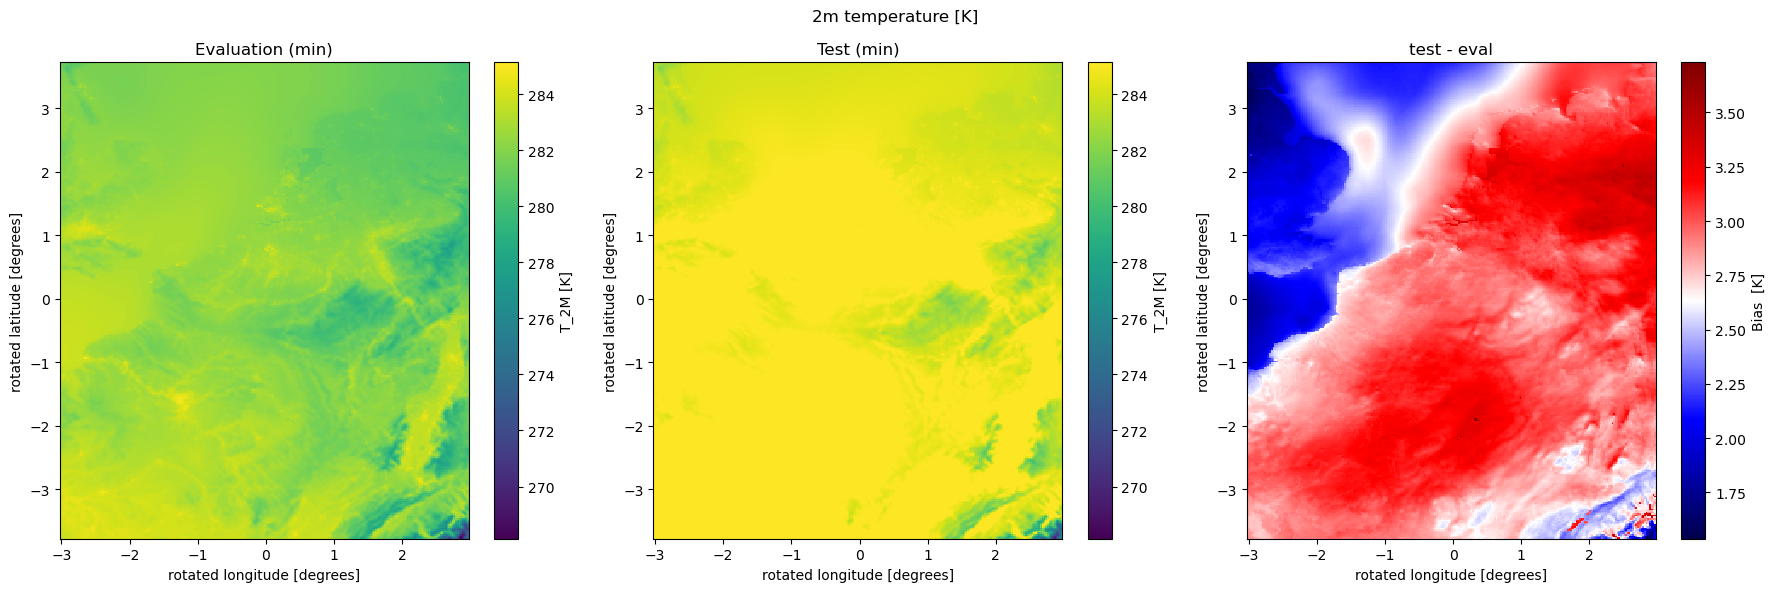

In [6]:
variable = "T_2M"
daily_statistic = "mean"

# load and preprocess experiments

da_exp  = load_gcm_experiment(experiment,variable,daily_statistic)
da_eval = load_era5_experiment(experiment_era5,variable,daily_statistic)

da_mean_exp, da_mean_eval, da_exp_yearly_avg, da_eval_yearly_avg = preprocess_experiments(da_exp, da_eval)

# create figures
fig = get_spaghetti_GLUE(da_mean_eval, da_mean_exp, variable)
fig.savefig(figdir_exp + f"lineplot_{experiment}_{variable}.png", dpi=300)

for statistic in ["mean","max","min"]: 

    fig = calc_plot_bias_map_eval(variable, da_eval_yearly_avg, da_exp_yearly_avg, months_to_analyse = [1,2,3,4,5,6,7,8,9,10,11,12], region='europe', statistic = statistic,flag_show = True)
    fig.savefig(figdir_exp + f"bias_map_{experiment}_{variable}_{statistic}.png", dpi=300)

### Surface temperature

In [5]:
variable = "T_S"
daily_statistic = "mean"

# load and preprocess experiments

da_exp  = load_gcm_experiment(experiment,variable,daily_statistic)
da_eval = load_era5_experiment(experiment_era5,variable,daily_statistic)

da_mean_exp, da_mean_eval, da_exp_yearly_avg, da_eval_yearly_avg = preprocess_experiments(da_exp, da_eval)

# create figures
fig = get_spaghetti_GLUE(da_mean_eval, da_mean_exp, variable)
fig.savefig(figdir_exp + f"lineplot_{experiment}_{variable}.png", dpi=300)

for statistic in ["mean","max","min"]: 

    fig = calc_plot_bias_map_eval(variable, da_eval_yearly_avg, da_exp_yearly_avg, months_to_analyse = [1,2,3,4,5,6,7,8,9,10,11,12], region='europe', statistic = statistic,flag_show = True)
    fig.savefig(figdir_exp + f"bias_map_{experiment}_{variable}_{statistic}.png", dpi=300)

/dodrio/scratch/projects/2022_200/project_output/rcs/CORDEXBE2/postprocessing/CB2_CCLM_BEL28_EC-Earth_test/T_S/daily/T_S_daily_mean_1995.nc


OSError: no files to open

### Total precipitation

/dodrio/scratch/projects/2022_200/project_output/rcs/CORDEXBE2/postprocessing/CB2_CCLM_BEL28_EC-Earth_test/TOT_PREC/daily/TOT_PREC_daily_sum_1995.nc
['/dodrio/scratch/projects/2022_200/project_output/rcs/CORDEXBE2/postprocessing/CB2_CCLM_BEL28_ERA5_evaluation/TOT_PREC/daily/TOT_PREC_daily_sum_1982.nc', '/dodrio/scratch/projects/2022_200/project_output/rcs/CORDEXBE2/postprocessing/CB2_CCLM_BEL28_ERA5_evaluation/TOT_PREC/daily/TOT_PREC_daily_sum_1983.nc', '/dodrio/scratch/projects/2022_200/project_output/rcs/CORDEXBE2/postprocessing/CB2_CCLM_BEL28_ERA5_evaluation/TOT_PREC/daily/TOT_PREC_daily_sum_1984.nc', '/dodrio/scratch/projects/2022_200/project_output/rcs/CORDEXBE2/postprocessing/CB2_CCLM_BEL28_ERA5_evaluation/TOT_PREC/daily/TOT_PREC_daily_sum_1985.nc', '/dodrio/scratch/projects/2022_200/project_output/rcs/CORDEXBE2/postprocessing/CB2_CCLM_BEL28_ERA5_evaluation/TOT_PREC/daily/TOT_PREC_daily_sum_1986.nc', '/dodrio/scratch/projects/2022_200/project_output/rcs/CORDEXBE2/postprocessing/C

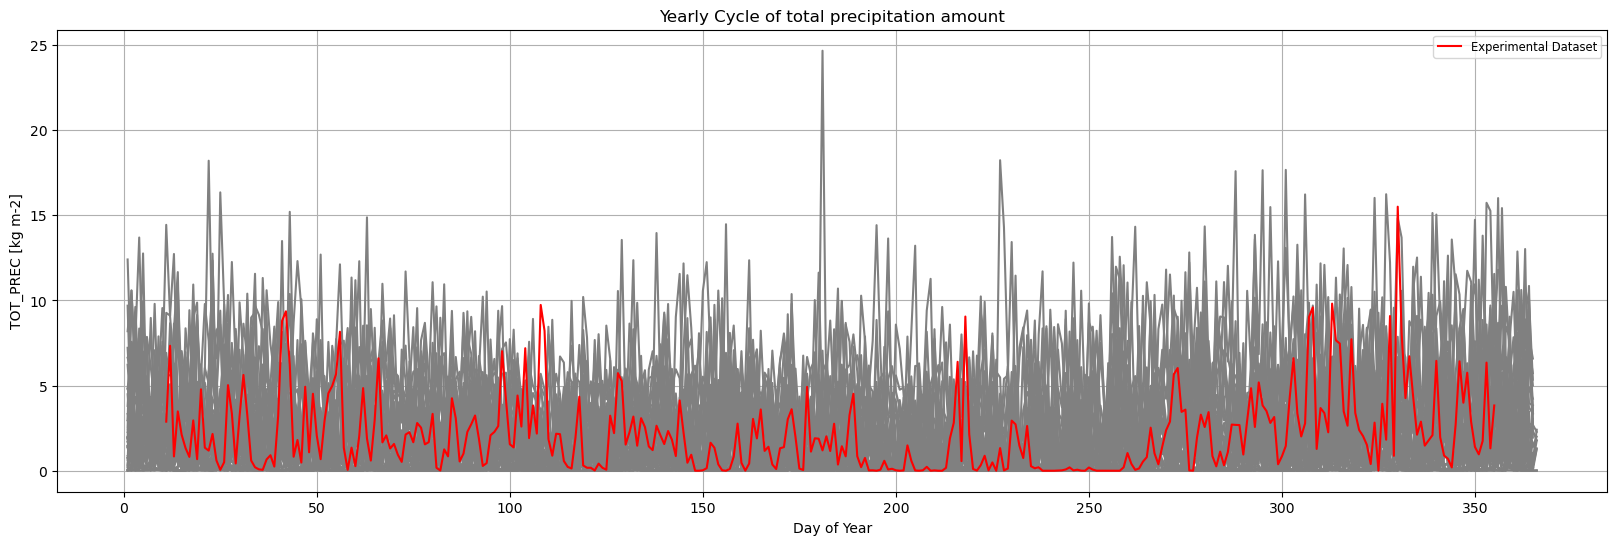

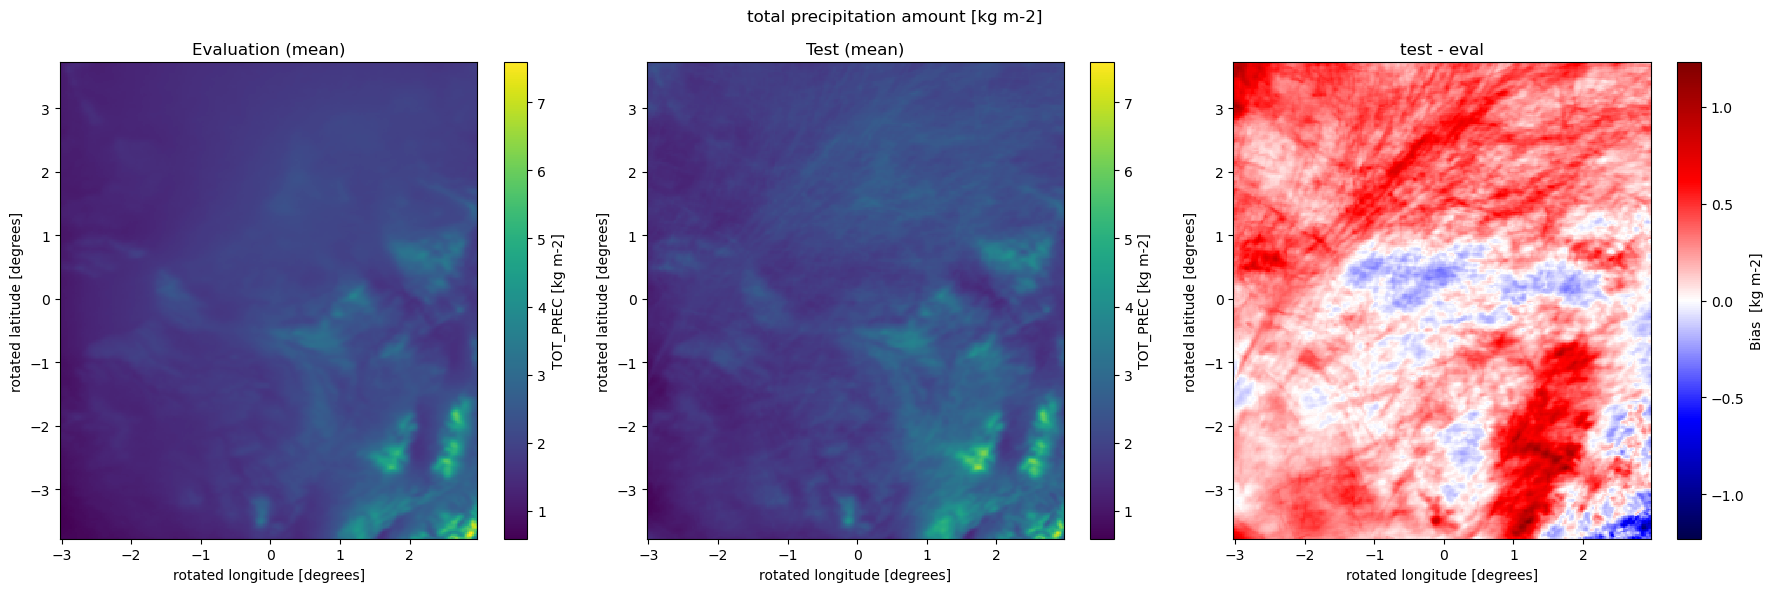

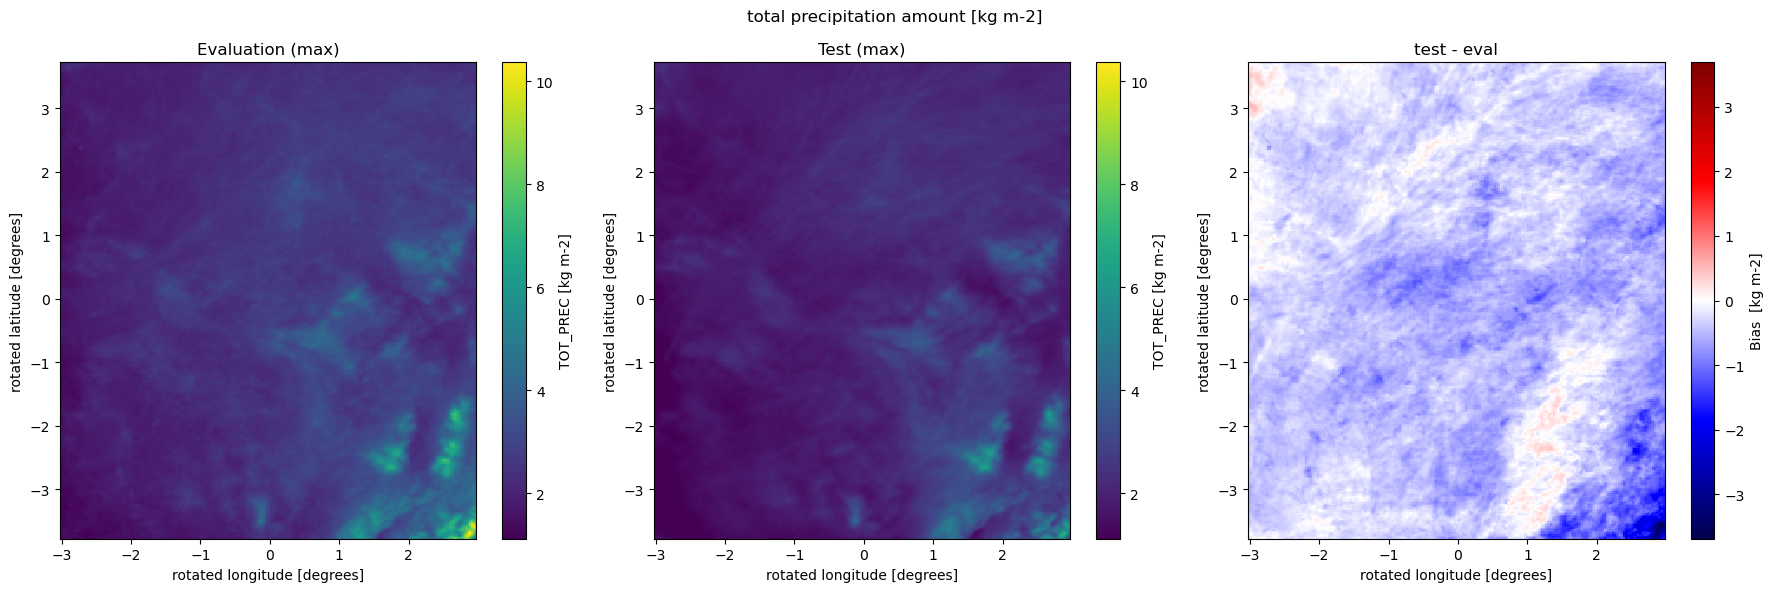

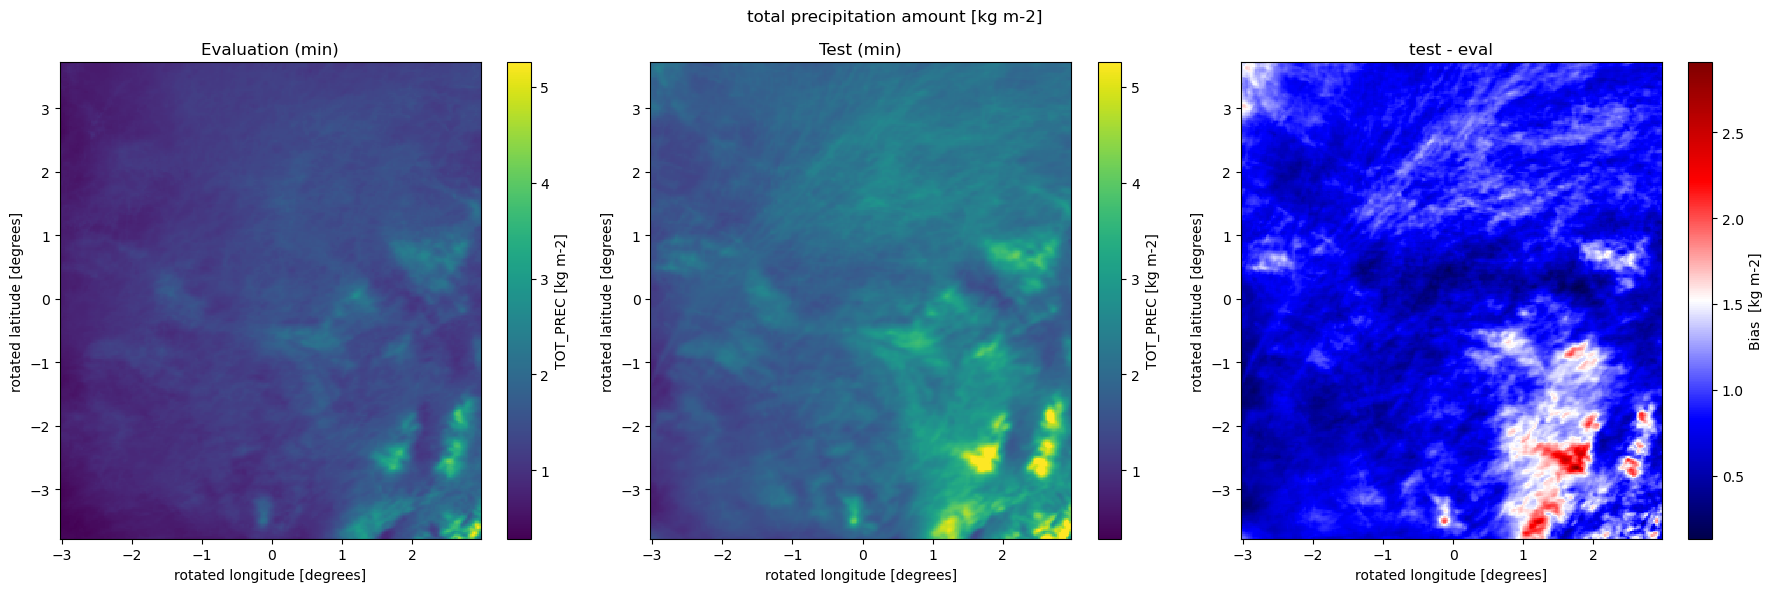

In [8]:
variable = "TOT_PREC"
daily_statistic = "sum"

# load and preprocess experiments

da_exp  = load_gcm_experiment(experiment,variable,daily_statistic)
da_eval = load_era5_experiment(experiment_era5,variable,daily_statistic)

da_mean_exp, da_mean_eval, da_exp_yearly_avg, da_eval_yearly_avg = preprocess_experiments(da_exp, da_eval)

# create figures
fig = get_spaghetti_GLUE(da_mean_eval, da_mean_exp, variable)
fig.savefig(figdir_exp + f"lineplot_{experiment}_{variable}.png", dpi=300)

for statistic in ["mean","max","min"]: 

    fig = calc_plot_bias_map_eval(variable, da_eval_yearly_avg, da_exp_yearly_avg, months_to_analyse = [1,2,3,4,5,6,7,8,9,10,11,12], region='europe', statistic = statistic,flag_show = True)
    fig.savefig(figdir_exp + f"bias_map_{experiment}_{variable}_{statistic}.png", dpi=300)

### Hydrometeors

In [ ]:
variable = "TQC"
daily_statistic = "sum"

# load and preprocess experiments

da_exp  = load_gcm_experiment(experiment,variable,daily_statistic)
da_eval = load_era5_experiment(experiment_era5,variable,daily_statistic)

da_mean_exp, da_mean_eval, da_exp_yearly_avg, da_eval_yearly_avg = preprocess_experiments(da_exp, da_eval)

# create figures
fig = get_spaghetti_GLUE(da_mean_eval, da_mean_exp, variable)
fig.savefig(figdir_exp + f"lineplot_{experiment}_{variable}.png", dpi=300)

for statistic in ["mean","max","min"]: 

    fig = calc_plot_bias_map_eval(variable, da_eval_yearly_avg, da_exp_yearly_avg, months_to_analyse = [1,2,3,4,5,6,7,8,9,10,11,12], region='europe', statistic = statistic,flag_show = True)
    fig.savefig(figdir_exp + f"bias_map_{experiment}_{variable}_{statistic}.png", dpi=300)

/dodrio/scratch/projects/2022_200/project_output/rcs/CORDEXBE2/postprocessing/CB2_CCLM_EUR11_MIROC6_test/TQC/daily/TQC_daily_sum_1995.nc


OSError: no files to open

In [ ]:
variable = "TQV"
daily_statistic = "sum"

# load and preprocess experiments

da_exp  = load_gcm_experiment(experiment,variable,daily_statistic)
da_eval = load_era5_experiment(experiment_era5,variable,daily_statistic)

da_mean_exp, da_mean_eval, da_exp_yearly_avg, da_eval_yearly_avg = preprocess_experiments(da_exp, da_eval)

# create figures
fig = get_spaghetti_GLUE(da_mean_eval, da_mean_exp, variable)
fig.savefig(figdir_exp + f"lineplot_{experiment}_{variable}.png", dpi=300)

for statistic in ["mean","max","min"]: 

    fig = calc_plot_bias_map_eval(variable, da_eval_yearly_avg, da_exp_yearly_avg, months_to_analyse = [1,2,3,4,5,6,7,8,9,10,11,12], region='europe', statistic = statistic,flag_show = True)
    fig.savefig(figdir_exp + f"bias_map_{experiment}_{variable}_{statistic}.png", dpi=300)

In [ ]:
variable = "TQR"
daily_statistic = "sum"

# load and preprocess experiments

da_exp  = load_gcm_experiment(experiment,variable,daily_statistic)
da_eval = load_era5_experiment(experiment_era5,variable,daily_statistic)

da_mean_exp, da_mean_eval, da_exp_yearly_avg, da_eval_yearly_avg = preprocess_experiments(da_exp, da_eval)

# create figures
fig = get_spaghetti_GLUE(da_mean_eval, da_mean_exp, variable)
fig.savefig(figdir_exp + f"lineplot_{experiment}_{variable}.png", dpi=300)

for statistic in ["mean","max","min"]: 

    fig = calc_plot_bias_map_eval(variable, da_eval_yearly_avg, da_exp_yearly_avg, months_to_analyse = [1,2,3,4,5,6,7,8,9,10,11,12], region='europe', statistic = statistic,flag_show = True)
    fig.savefig(figdir_exp + f"bias_map_{experiment}_{variable}_{statistic}.png", dpi=300)

In [ ]:
variable = "TQS"
daily_statistic = "sum"

# load and preprocess experiments

da_exp  = load_gcm_experiment(experiment,variable,daily_statistic)
da_eval = load_era5_experiment(experiment_era5,variable,daily_statistic)

da_mean_exp, da_mean_eval, da_exp_yearly_avg, da_eval_yearly_avg = preprocess_experiments(da_exp, da_eval)

# create figures
fig = get_spaghetti_GLUE(da_mean_eval, da_mean_exp, variable)
fig.savefig(figdir_exp + f"lineplot_{experiment}_{variable}.png", dpi=300)

for statistic in ["mean","max","min"]: 

    fig = calc_plot_bias_map_eval(variable, da_eval_yearly_avg, da_exp_yearly_avg, months_to_analyse = [1,2,3,4,5,6,7,8,9,10,11,12], region='europe', statistic = statistic,flag_show = True)
    fig.savefig(figdir_exp + f"bias_map_{experiment}_{variable}_{statistic}.png", dpi=300)

In [ ]:
variable = "TQI"
daily_statistic = "sum"

# load and preprocess experiments

da_exp  = load_gcm_experiment(experiment,variable,daily_statistic)
da_eval = load_era5_experiment(experiment_era5,variable,daily_statistic)

da_mean_exp, da_mean_eval, da_exp_yearly_avg, da_eval_yearly_avg = preprocess_experiments(da_exp, da_eval)

# create figures
fig = get_spaghetti_GLUE(da_mean_eval, da_mean_exp, variable)
fig.savefig(figdir_exp + f"lineplot_{experiment}_{variable}.png", dpi=300)

for statistic in ["mean","max","min"]: 

    fig = calc_plot_bias_map_eval(variable, da_eval_yearly_avg, da_exp_yearly_avg, months_to_analyse = [1,2,3,4,5,6,7,8,9,10,11,12], region='europe', statistic = statistic,flag_show = True)
    fig.savefig(figdir_exp + f"bias_map_{experiment}_{variable}_{statistic}.png", dpi=300)

### Surface wind

In [7]:
variable = "U_10M"
daily_statistic = "mean"

da_exp_u  = load_gcm_experiment(experiment,variable,daily_statistic)
da_eval_u = load_era5_experiment(experiment_era5,variable, daily_statistic)

variable = "V_10M"

da_exp_v  = load_gcm_experiment(experiment, variable, daily_statistic)
da_eval_v = load_era5_experiment(experiment_era5, variable, daily_statistic)

da_exp = np.sqrt(da_exp_u**2 + da_exp_v**2)
da_eval = np.sqrt(da_eval_u**2 + da_eval_v**2)
da_eval.attrs['standard_name'] = 'wind_speed_10m'
da_eval.attrs['long_name'] = 'wind speed at 10m'

# load and preprocess experiments

da_mean_exp, da_mean_eval, da_exp_yearly_avg, da_eval_yearly_avg = preprocess_experiments(da_exp, da_eval)

# create figures
fig = get_spaghetti_GLUE(da_mean_eval, da_mean_exp, variable)
fig.savefig(figdir_exp + f"lineplot_{experiment}_{variable}.png", dpi=300)

for statistic in ["mean","max","min"]: 

    fig = calc_plot_bias_map_eval(variable, da_eval_yearly_avg, da_exp_yearly_avg, months_to_analyse = [1,2,3,4,5,6,7,8,9,10,11,12], region='europe', statistic = statistic,flag_show = True)
    fig.savefig(figdir_exp + f"bias_map_{experiment}_{variable}_{statistic}.png", dpi=300)



/dodrio/scratch/projects/2022_200/project_output/rcs/CORDEXBE2/postprocessing/CB2_CCLM_BEL28_EC-Earth_test/U_10M/daily/U_10M_daily_mean_1995.nc


OSError: no files to open

### PMSL

/dodrio/scratch/projects/2022_200/project_output/rcs/CORDEXBE2/postprocessing/CB2_CCLM_BEL28_EC-Earth_test/PMSL/daily/PMSL_daily_mean_1995.nc


['/dodrio/scratch/projects/2022_200/project_output/rcs/CORDEXBE2/postprocessing/CB2_CCLM_BEL28_ERA5_evaluation/PMSL/daily/PMSL_daily_mean_1982.nc', '/dodrio/scratch/projects/2022_200/project_output/rcs/CORDEXBE2/postprocessing/CB2_CCLM_BEL28_ERA5_evaluation/PMSL/daily/PMSL_daily_mean_1983.nc', '/dodrio/scratch/projects/2022_200/project_output/rcs/CORDEXBE2/postprocessing/CB2_CCLM_BEL28_ERA5_evaluation/PMSL/daily/PMSL_daily_mean_1984.nc', '/dodrio/scratch/projects/2022_200/project_output/rcs/CORDEXBE2/postprocessing/CB2_CCLM_BEL28_ERA5_evaluation/PMSL/daily/PMSL_daily_mean_1985.nc', '/dodrio/scratch/projects/2022_200/project_output/rcs/CORDEXBE2/postprocessing/CB2_CCLM_BEL28_ERA5_evaluation/PMSL/daily/PMSL_daily_mean_1986.nc', '/dodrio/scratch/projects/2022_200/project_output/rcs/CORDEXBE2/postprocessing/CB2_CCLM_BEL28_ERA5_evaluation/PMSL/daily/PMSL_daily_mean_1987.nc', '/dodrio/scratch/projects/2022_200/project_output/rcs/CORDEXBE2/postprocessing/CB2_CCLM_BEL28_ERA5_evaluation/PMSL/da

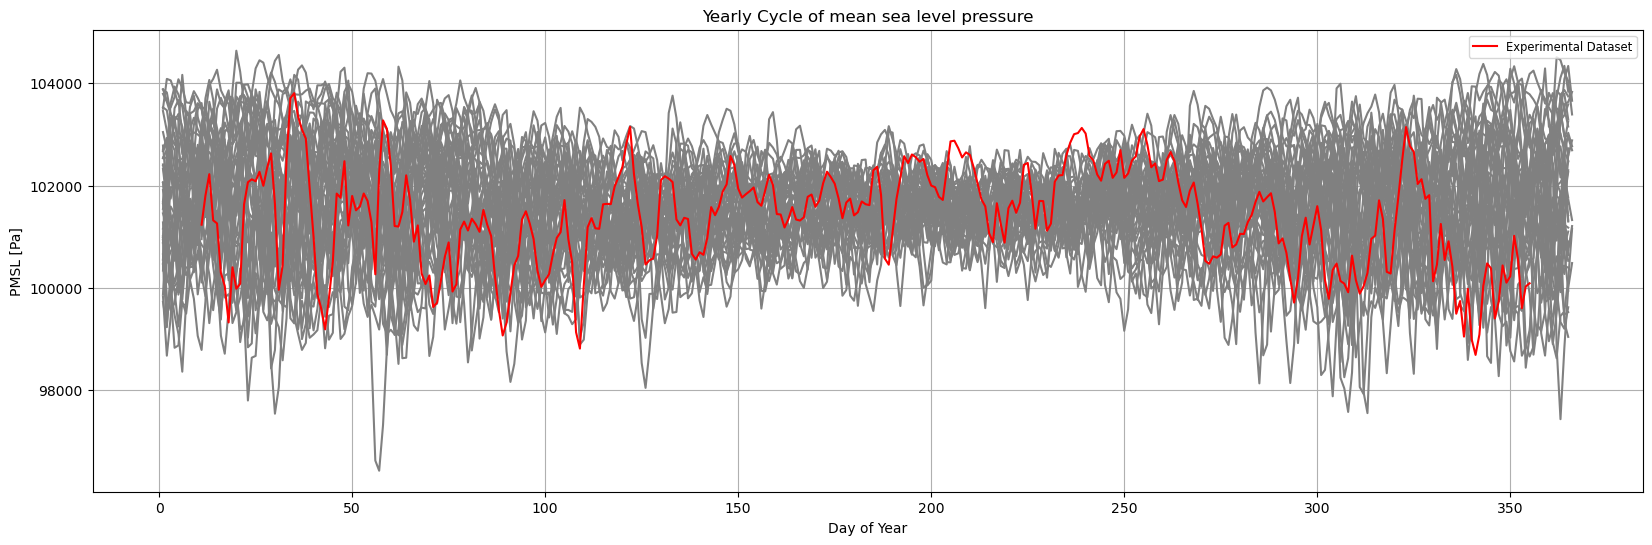

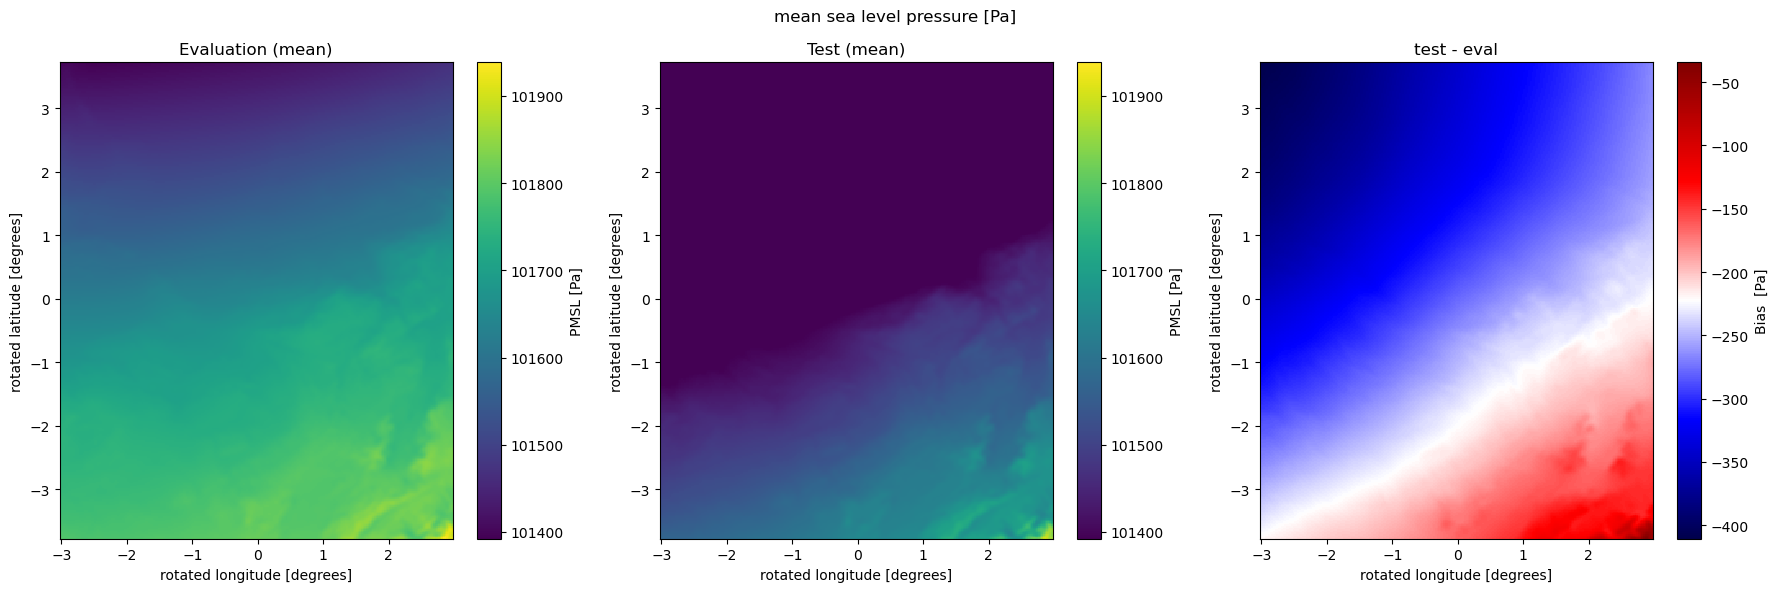

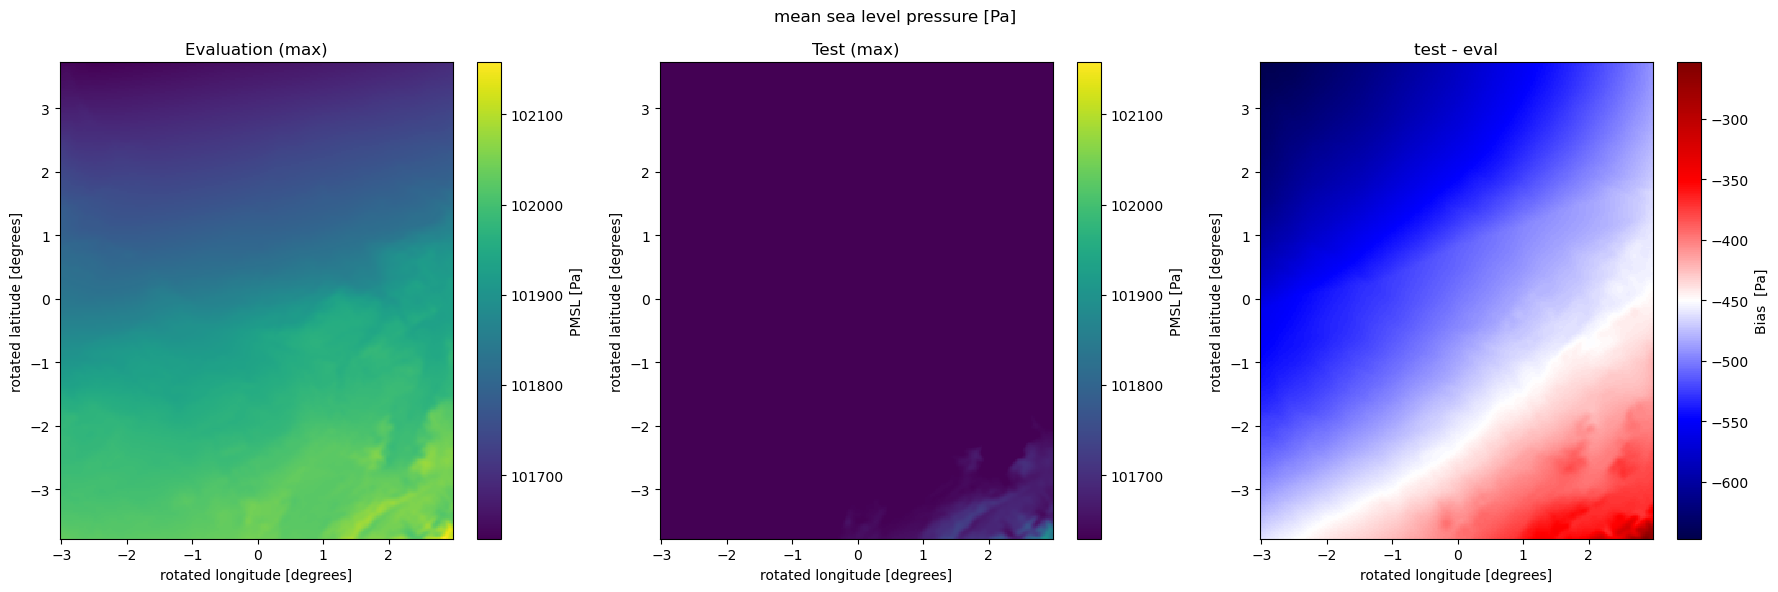

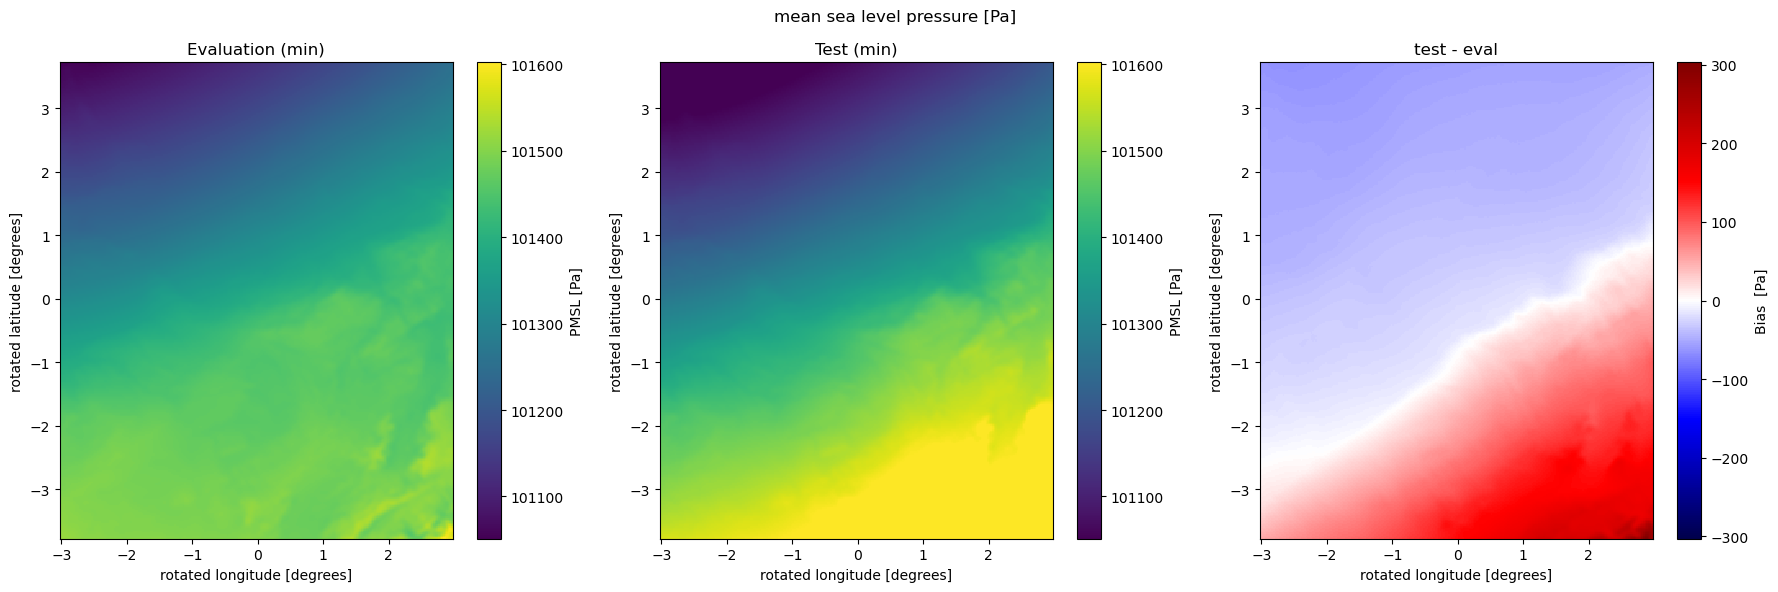

In [9]:
variable = "PMSL"
daily_statistic = "mean"

# load and preprocess experiments
da_exp  = load_gcm_experiment(experiment,variable,daily_statistic)
da_eval = load_era5_experiment(experiment_era5,variable,daily_statistic)

da_mean_exp, da_mean_eval, da_exp_yearly_avg, da_eval_yearly_avg = preprocess_experiments(da_exp, da_eval)

# create figures
fig = get_spaghetti_GLUE(da_mean_eval, da_mean_exp, variable)
fig.savefig(figdir_exp + f"lineplot_{experiment}_{variable}.png", dpi=300)

for statistic in ["mean","max","min"]: 

    fig = calc_plot_bias_map_eval(variable, da_eval_yearly_avg, da_exp_yearly_avg, months_to_analyse = [1,2,3,4,5,6,7,8,9,10,11,12], region='europe', statistic = statistic,flag_show = True)
    fig.savefig(figdir_exp + f"bias_map_{experiment}_{variable}_{statistic}.png", dpi=300)

### QV_2M

/dodrio/scratch/projects/2022_200/project_output/rcs/CORDEXBE2/postprocessing/CB2_CCLM_BEL28_EC-Earth_test/QV_2M/daily/QV_2M_daily_mean_1995.nc
['/dodrio/scratch/projects/2022_200/project_output/rcs/CORDEXBE2/postprocessing/CB2_CCLM_BEL28_ERA5_evaluation/QV_2M/daily/QV_2M_daily_mean_1982.nc', '/dodrio/scratch/projects/2022_200/project_output/rcs/CORDEXBE2/postprocessing/CB2_CCLM_BEL28_ERA5_evaluation/QV_2M/daily/QV_2M_daily_mean_1983.nc', '/dodrio/scratch/projects/2022_200/project_output/rcs/CORDEXBE2/postprocessing/CB2_CCLM_BEL28_ERA5_evaluation/QV_2M/daily/QV_2M_daily_mean_1984.nc', '/dodrio/scratch/projects/2022_200/project_output/rcs/CORDEXBE2/postprocessing/CB2_CCLM_BEL28_ERA5_evaluation/QV_2M/daily/QV_2M_daily_mean_1985.nc', '/dodrio/scratch/projects/2022_200/project_output/rcs/CORDEXBE2/postprocessing/CB2_CCLM_BEL28_ERA5_evaluation/QV_2M/daily/QV_2M_daily_mean_1986.nc', '/dodrio/scratch/projects/2022_200/project_output/rcs/CORDEXBE2/postprocessing/CB2_CCLM_BEL28_ERA5_evaluation/

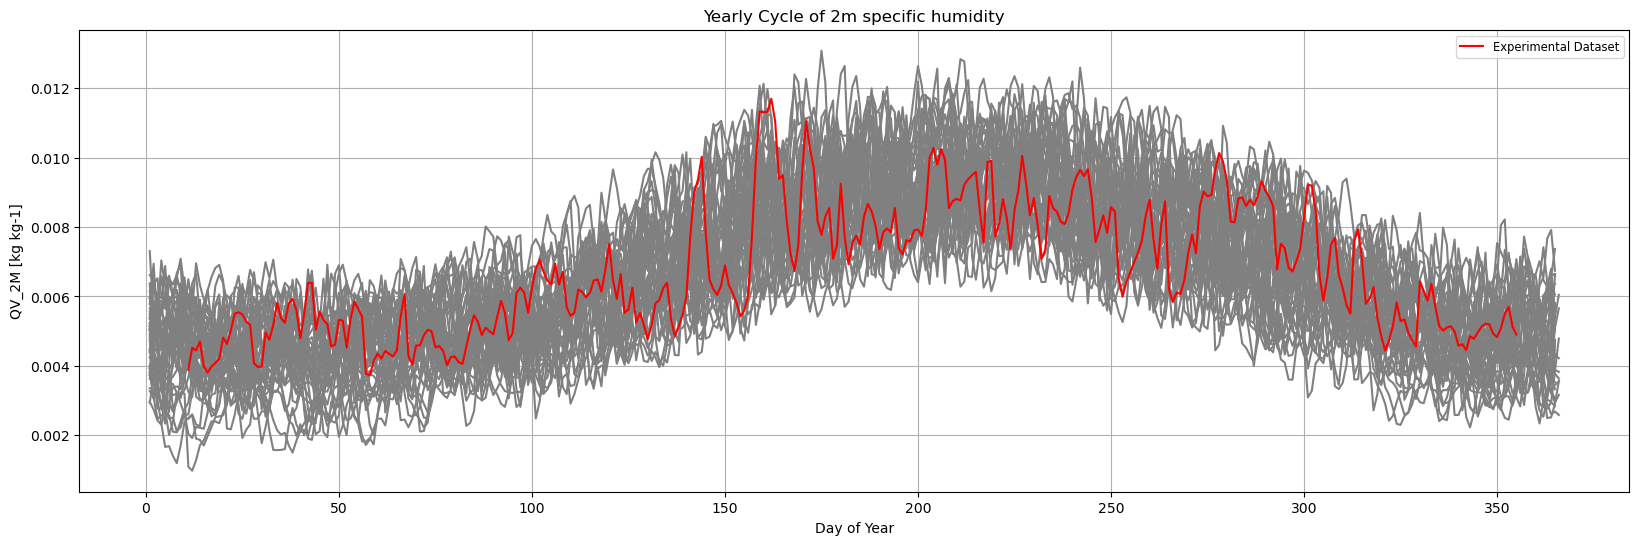

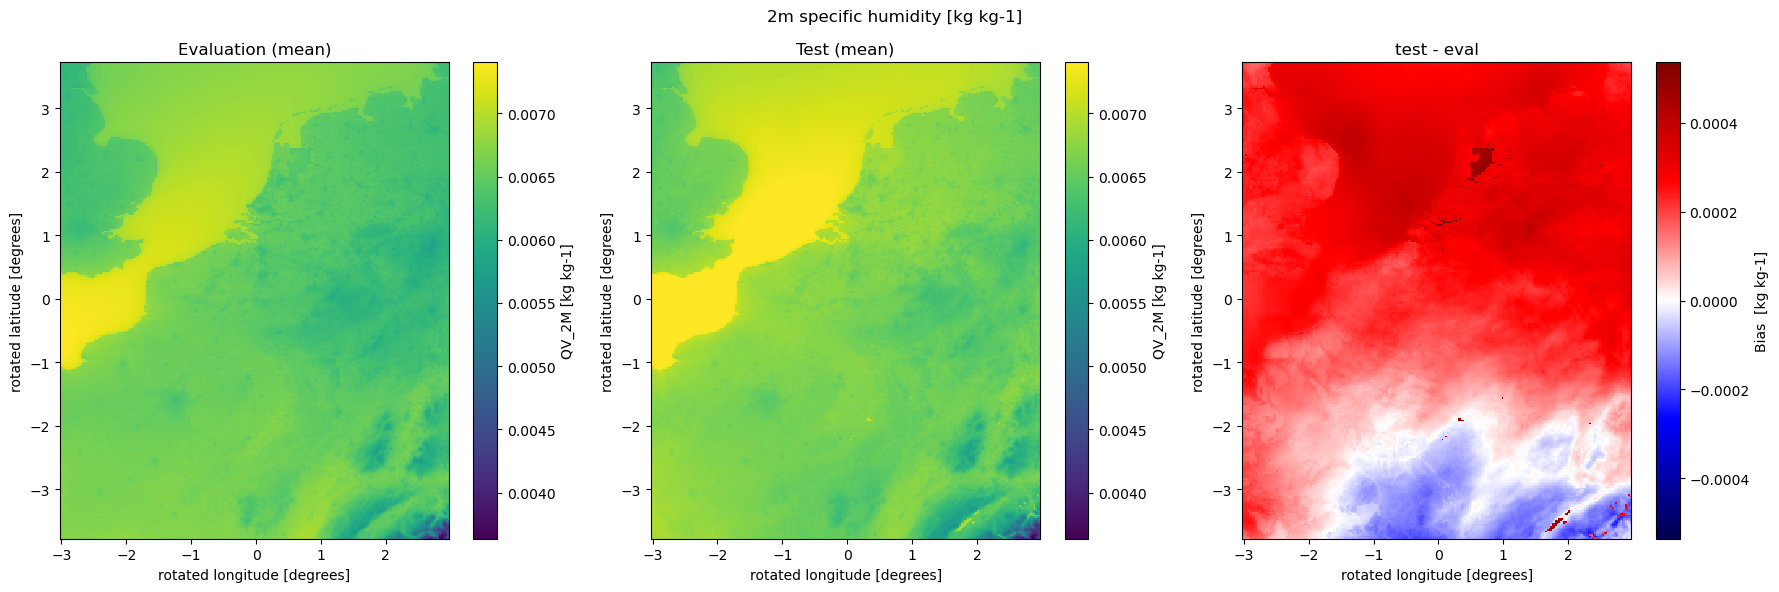

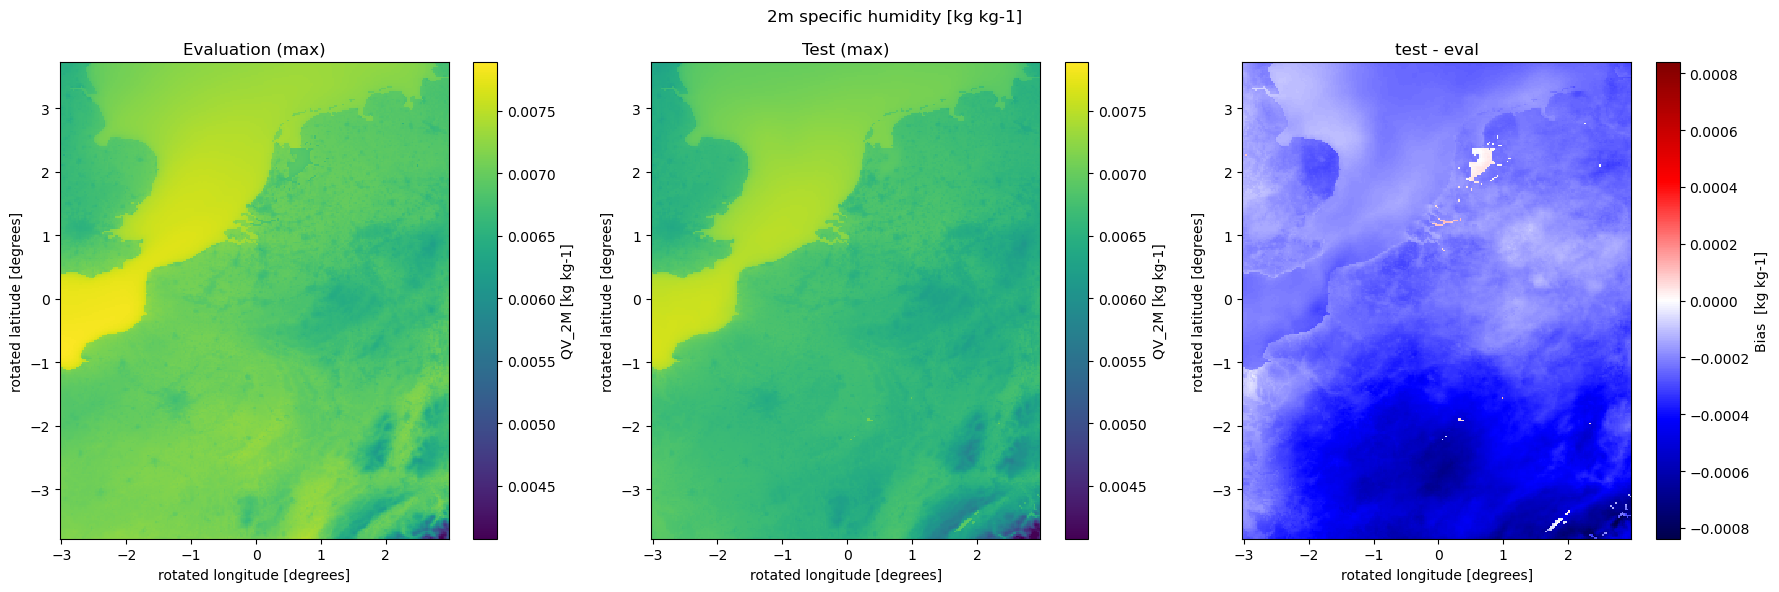

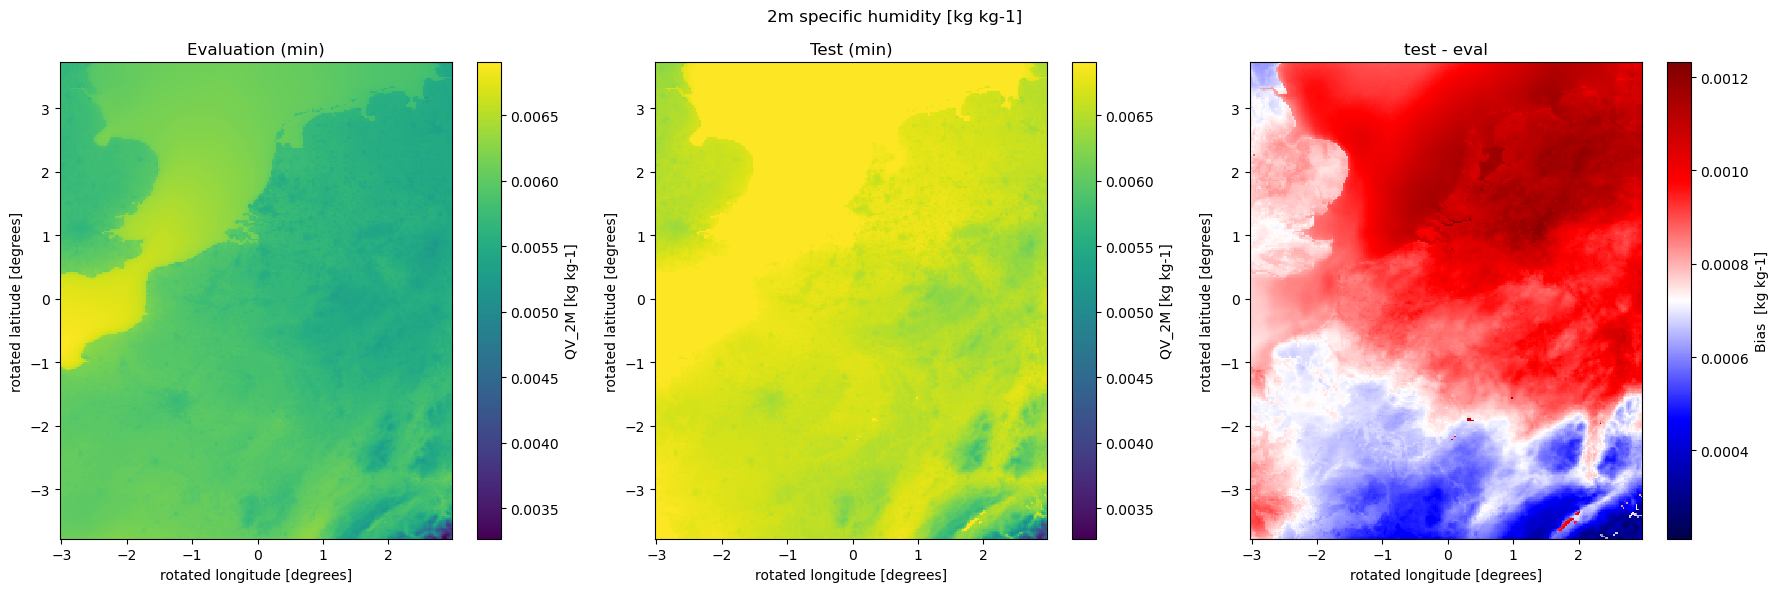

In [10]:
variable = "QV_2M"
daily_statistic = "mean"

# load and preprocess experiments

da_exp  = load_gcm_experiment(experiment,variable,daily_statistic)
da_eval = load_era5_experiment(experiment_era5,variable,daily_statistic)

da_mean_exp, da_mean_eval, da_exp_yearly_avg, da_eval_yearly_avg = preprocess_experiments(da_exp, da_eval)

# create figures
fig = get_spaghetti_GLUE(da_mean_eval, da_mean_exp, variable)
fig.savefig(figdir_exp + f"lineplot_{experiment}_{variable}.png", dpi=300)

for statistic in ["mean","max","min"]: 

    fig = calc_plot_bias_map_eval(variable, da_eval_yearly_avg, da_exp_yearly_avg, months_to_analyse = [1,2,3,4,5,6,7,8,9,10,11,12], region='europe', statistic = statistic,flag_show = True)
    fig.savefig(figdir_exp + f"bias_map_{experiment}_{variable}_{statistic}.png", dpi=300)

### Shortwave Radiation

/dodrio/scratch/projects/2022_200/project_output/rcs/CORDEXBE2/postprocessing/CB2_CCLM_BEL28_EC-Earth_test/ASODIFD_S/daily/ASODIFD_S_daily_mean_1995.nc


['/dodrio/scratch/projects/2022_200/project_output/rcs/CORDEXBE2/postprocessing/CB2_CCLM_BEL28_ERA5_evaluation/ASODIFD_S/daily/ASODIFD_S_daily_mean_1982.nc', '/dodrio/scratch/projects/2022_200/project_output/rcs/CORDEXBE2/postprocessing/CB2_CCLM_BEL28_ERA5_evaluation/ASODIFD_S/daily/ASODIFD_S_daily_mean_1983.nc', '/dodrio/scratch/projects/2022_200/project_output/rcs/CORDEXBE2/postprocessing/CB2_CCLM_BEL28_ERA5_evaluation/ASODIFD_S/daily/ASODIFD_S_daily_mean_1984.nc', '/dodrio/scratch/projects/2022_200/project_output/rcs/CORDEXBE2/postprocessing/CB2_CCLM_BEL28_ERA5_evaluation/ASODIFD_S/daily/ASODIFD_S_daily_mean_1985.nc', '/dodrio/scratch/projects/2022_200/project_output/rcs/CORDEXBE2/postprocessing/CB2_CCLM_BEL28_ERA5_evaluation/ASODIFD_S/daily/ASODIFD_S_daily_mean_1986.nc', '/dodrio/scratch/projects/2022_200/project_output/rcs/CORDEXBE2/postprocessing/CB2_CCLM_BEL28_ERA5_evaluation/ASODIFD_S/daily/ASODIFD_S_daily_mean_1987.nc', '/dodrio/scratch/projects/2022_200/project_output/rcs/COR

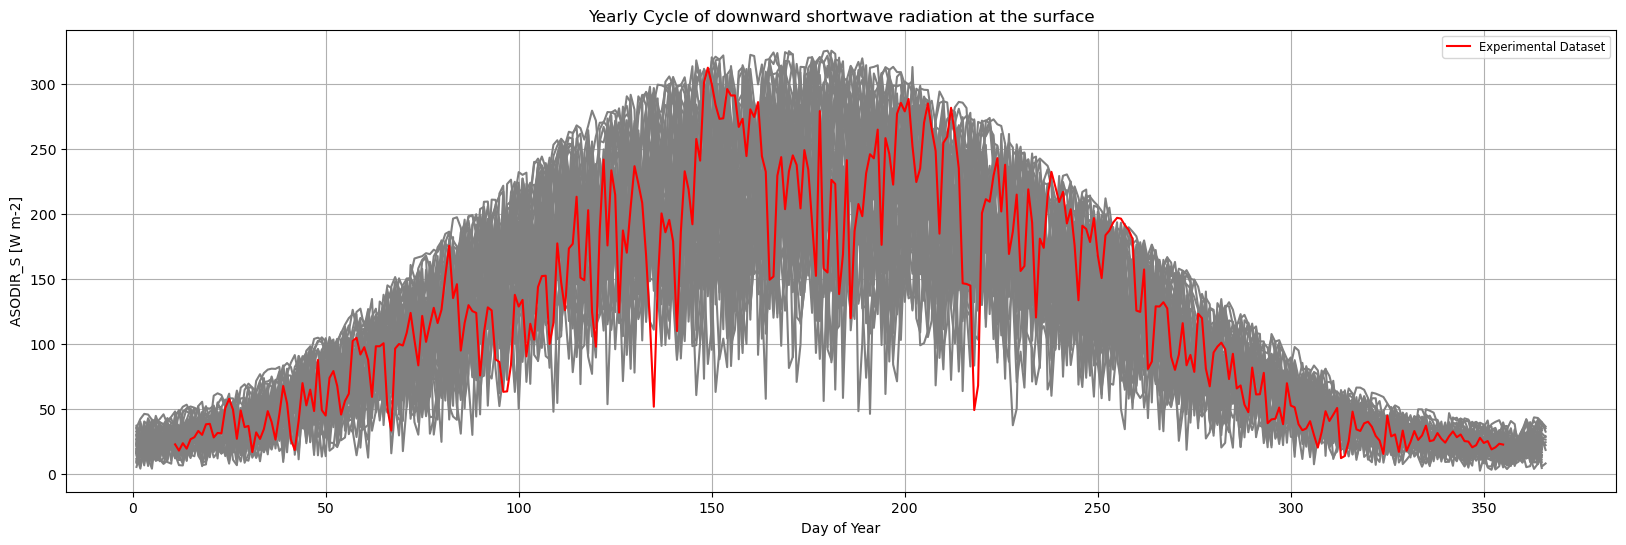

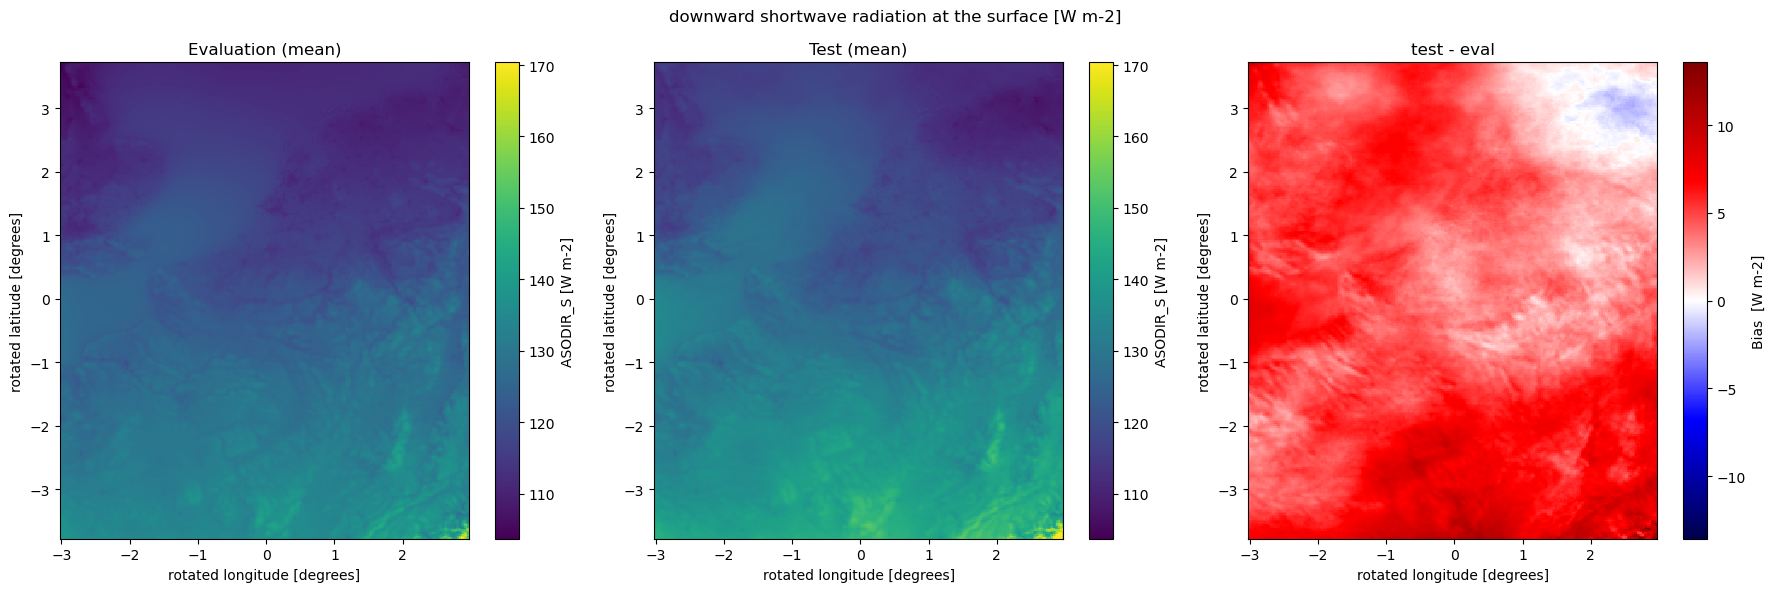

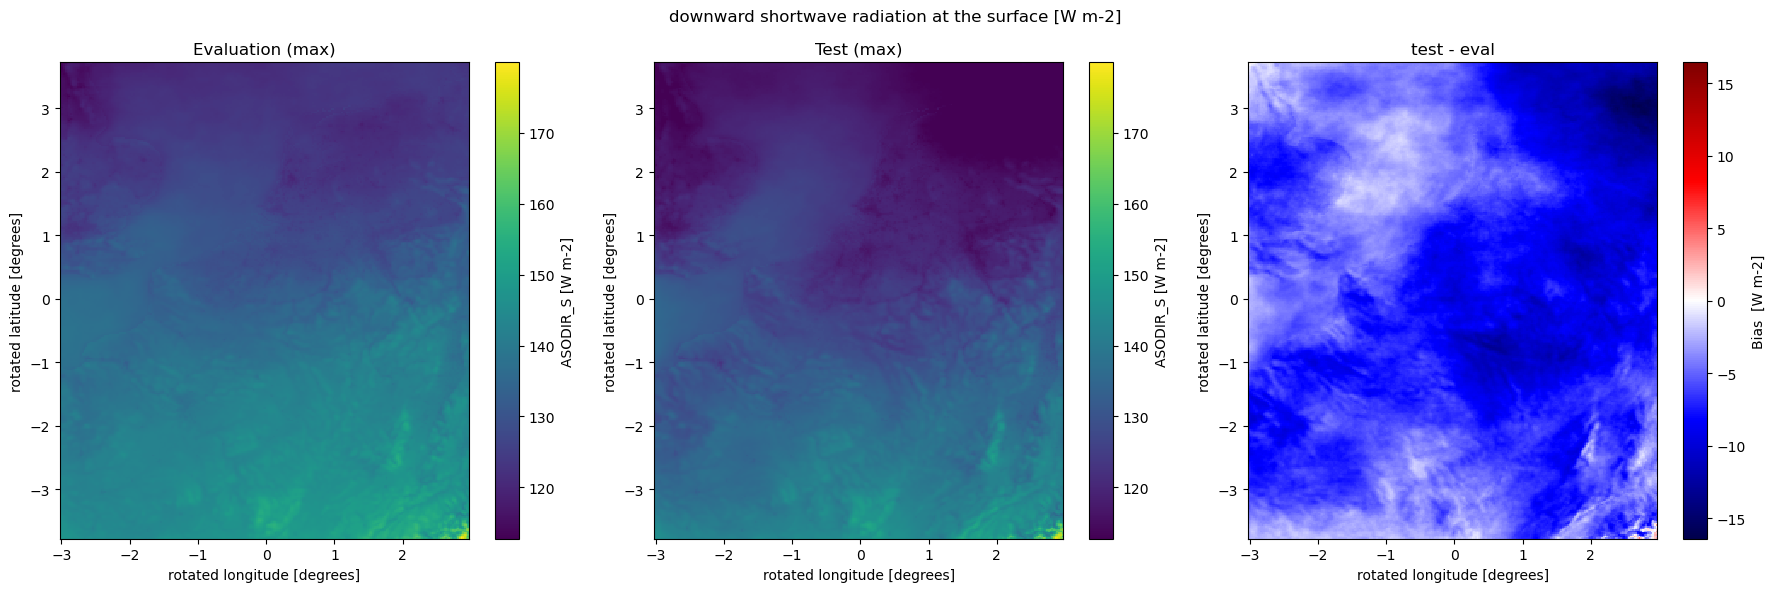

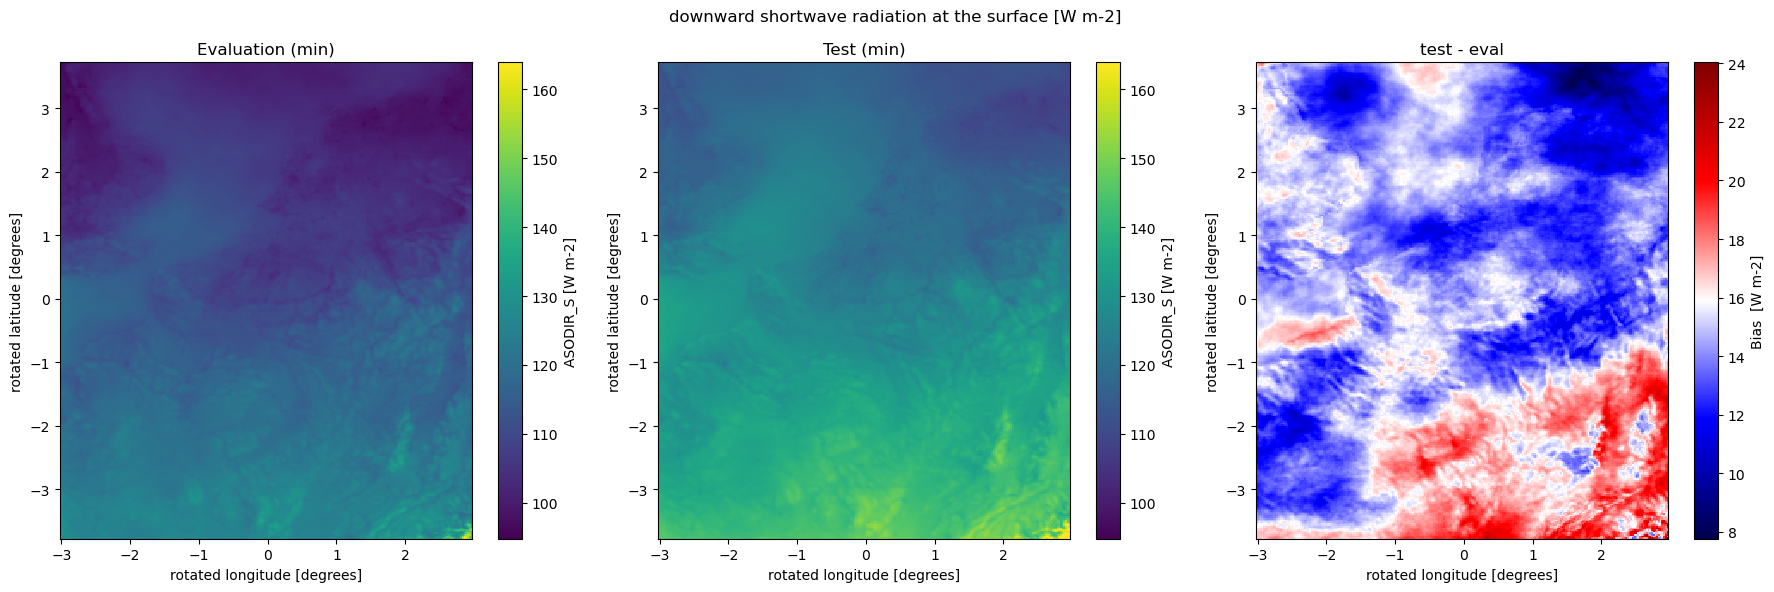

In [11]:
variable = "ASODIFD_S"
daily_statistic = "mean"

da_exp_diffuse  = load_gcm_experiment(experiment,variable,daily_statistic)
da_eval_diffuse = load_era5_experiment(experiment_era5,variable, daily_statistic)


variable = "ASODIR_S"
da_exp_direct  = load_gcm_experiment(experiment,variable,daily_statistic)
da_eval_direct = load_era5_experiment(experiment_era5,variable, daily_statistic)

da_eval = da_eval_direct + da_eval_diffuse
da_exp = da_exp_direct + da_exp_diffuse

da_eval.attrs['standard_name'] = 'downwelling_shortwave_radiation'
da_eval.attrs['long_name'] = 'downward shortwave radiation at the surface'

# load and preprocess experiments
da_mean_exp, da_mean_eval, da_exp_yearly_avg, da_eval_yearly_avg = preprocess_experiments(da_exp, da_eval)

# create figures
fig = get_spaghetti_GLUE(da_mean_eval, da_mean_exp, variable)
fig.savefig(figdir_exp + f"lineplot_{experiment}_{variable}.png", dpi=300)

for statistic in ["mean","max","min"]: 

    fig = calc_plot_bias_map_eval(variable, da_eval_yearly_avg, da_exp_yearly_avg, months_to_analyse = [1,2,3,4,5,6,7,8,9,10,11,12], region='europe', statistic = statistic,flag_show = True)
    fig.savefig(figdir_exp + f"bias_map_{experiment}_{variable}_{statistic}.png", dpi=300)

### Net longwave radiation

/dodrio/scratch/projects/2022_200/project_output/rcs/CORDEXBE2/postprocessing/CB2_CCLM_BEL28_EC-Earth_test/ATHB_S/daily/ATHB_S_daily_mean_1995.nc
['/dodrio/scratch/projects/2022_200/project_output/rcs/CORDEXBE2/postprocessing/CB2_CCLM_BEL28_ERA5_evaluation/ATHB_S/daily/ATHB_S_daily_mean_1982.nc', '/dodrio/scratch/projects/2022_200/project_output/rcs/CORDEXBE2/postprocessing/CB2_CCLM_BEL28_ERA5_evaluation/ATHB_S/daily/ATHB_S_daily_mean_1983.nc', '/dodrio/scratch/projects/2022_200/project_output/rcs/CORDEXBE2/postprocessing/CB2_CCLM_BEL28_ERA5_evaluation/ATHB_S/daily/ATHB_S_daily_mean_1984.nc', '/dodrio/scratch/projects/2022_200/project_output/rcs/CORDEXBE2/postprocessing/CB2_CCLM_BEL28_ERA5_evaluation/ATHB_S/daily/ATHB_S_daily_mean_1985.nc', '/dodrio/scratch/projects/2022_200/project_output/rcs/CORDEXBE2/postprocessing/CB2_CCLM_BEL28_ERA5_evaluation/ATHB_S/daily/ATHB_S_daily_mean_1986.nc', '/dodrio/scratch/projects/2022_200/project_output/rcs/CORDEXBE2/postprocessing/CB2_CCLM_BEL28_ERA5

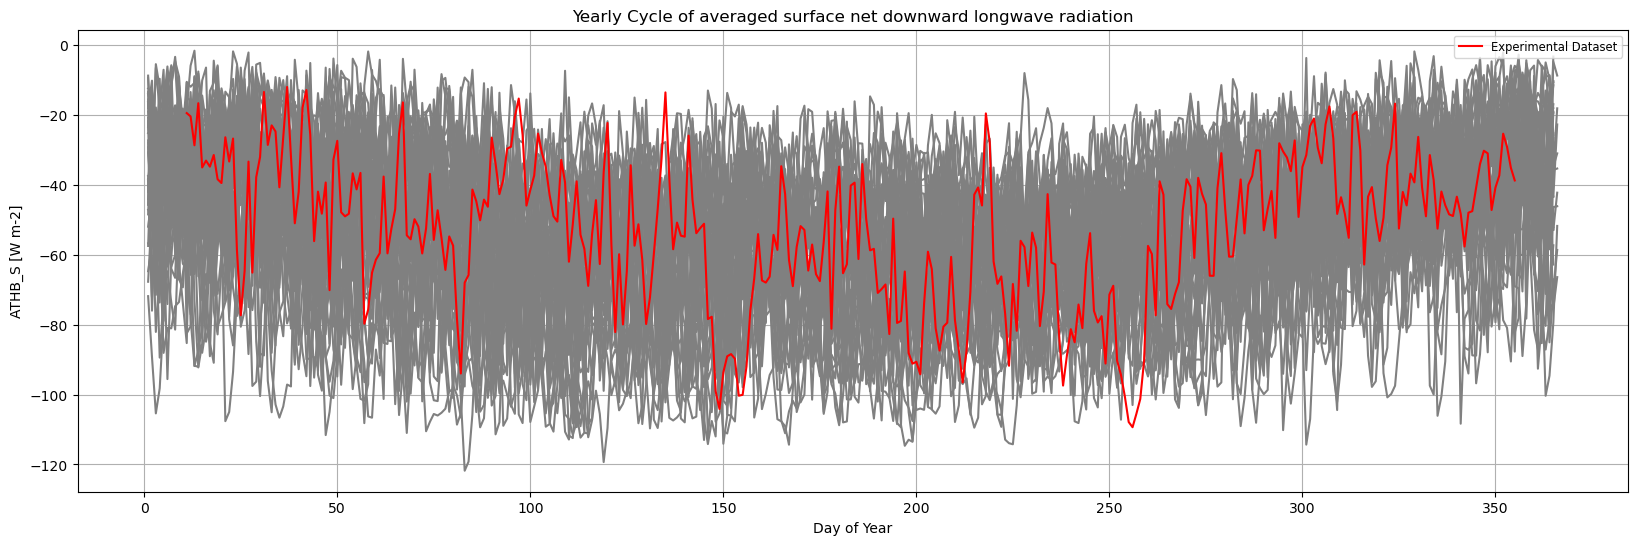

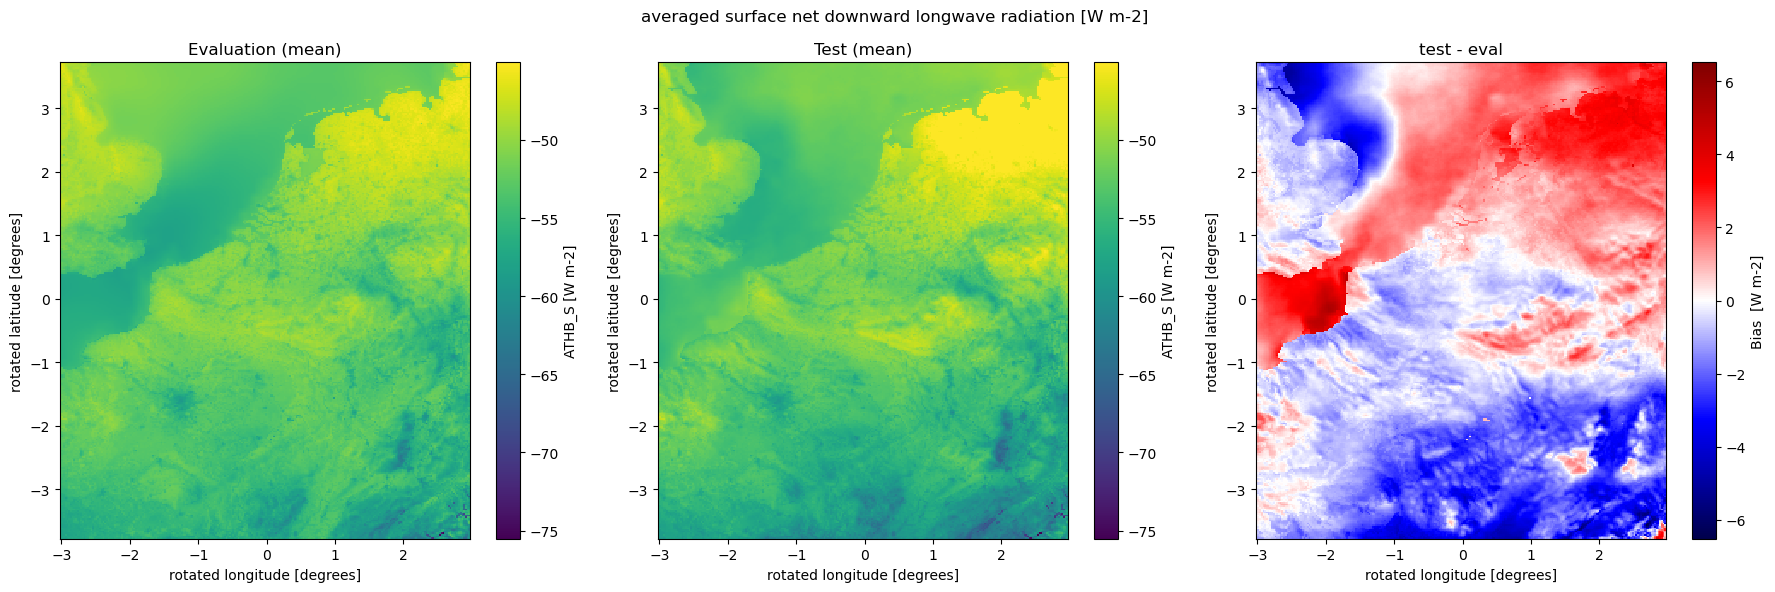

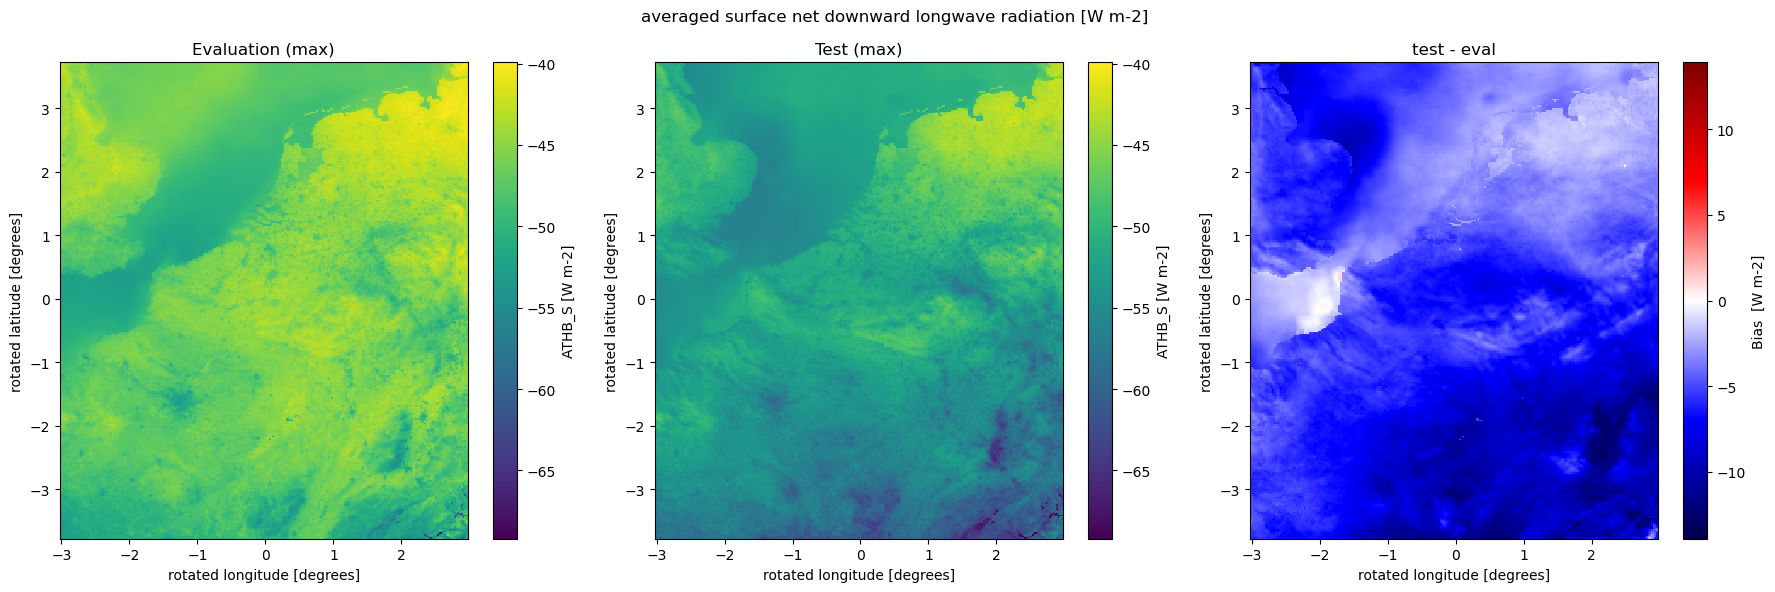

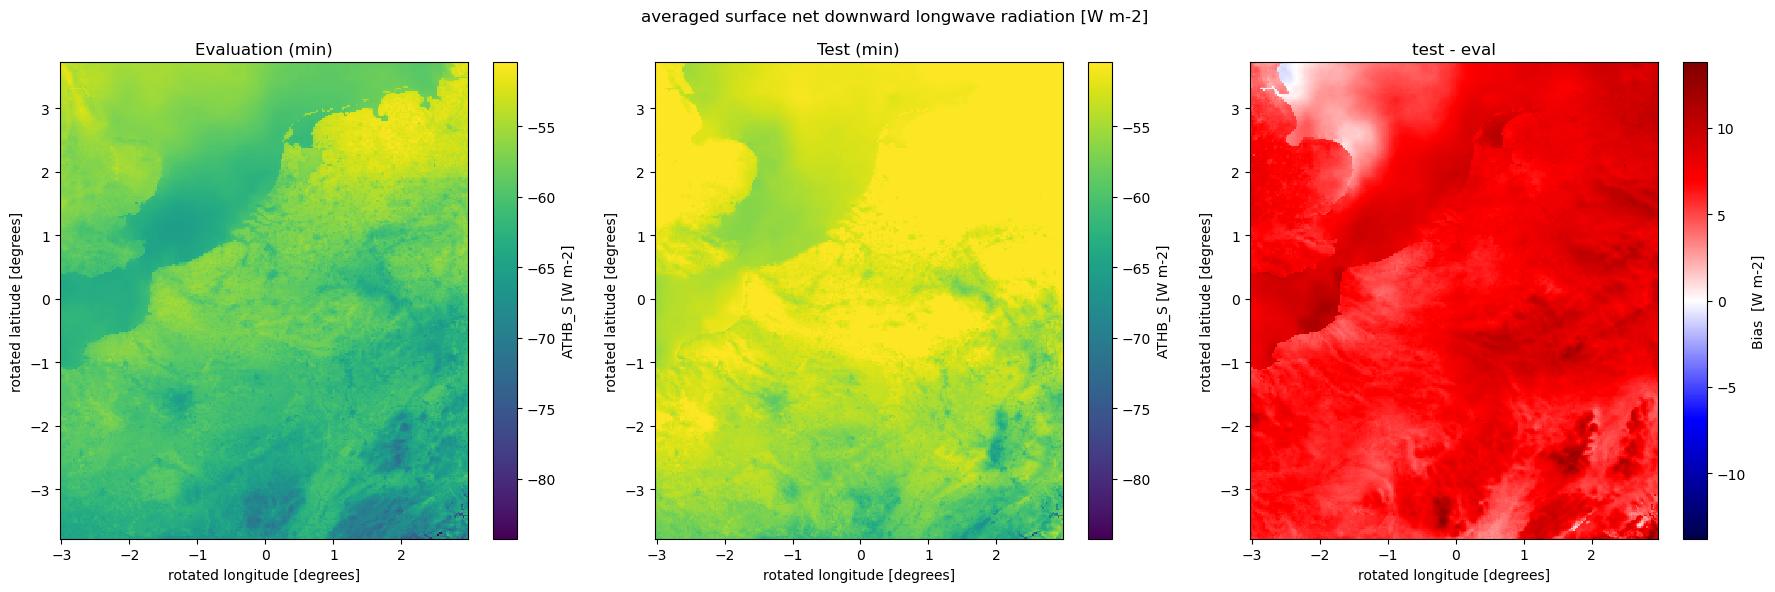

In [12]:
variable = "ATHB_S"
daily_statistic = "mean"

# load and preprocess experiments

da_exp  = load_gcm_experiment(experiment,variable,daily_statistic)
da_eval = load_era5_experiment(experiment_era5,variable,daily_statistic)

da_mean_exp, da_mean_eval, da_exp_yearly_avg, da_eval_yearly_avg = preprocess_experiments(da_exp, da_eval)

# create figures
fig = get_spaghetti_GLUE(da_mean_eval, da_mean_exp, variable)
fig.savefig(figdir_exp + f"lineplot_{experiment}_{variable}.png", dpi=300)

for statistic in ["mean","max","min"]: 

    fig = calc_plot_bias_map_eval(variable, da_eval_yearly_avg, da_exp_yearly_avg, months_to_analyse = [1,2,3,4,5,6,7,8,9,10,11,12], region='europe', statistic = statistic,flag_show = True)
    fig.savefig(figdir_exp + f"bias_map_{experiment}_{variable}_{statistic}.png", dpi=300)